# Miller-Tans SVB

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import date, timedelta
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import PIL
import datetime
import seaborn as sns
from scipy import stats
from pylr2 import regress2
import random
from statistics import mode
from scipy import stats

## Functions

In [3]:
# # Conversion Fm (Fraction Modern) to $\Delta$^14^C
def fm_D14C(fm,yr,lft=8267):
    dcy=fm*np.exp((1950-yr)/lft)
    D14C=(dcy-1)*1000
    return D14C

#Conversion $\Delta$^14^C to Fm (Fraction Modern)
def D14C_fm(D14C,yr,lft=8267):
    fm=(D14C/1000+1)*np.exp((yr-1950)/lft)
    return fm
# index o nearest date
def nearest_ind(items, pivot):
    time_diff = np.abs([date - pivot for date in items])
    return time_diff.argmin()+1

## Read data

In [3]:
# d13C
fw=pd.read_excel('~/Documents/MSCA/DISEQ/Prades_model/Data/LabResults/Air_ecosystem_d13C.xls')
fw['sampling time']=pd.to_datetime(fw['sampling time'])
#fw['time']=pd.to_datetime(fw['sampling time'].astype(str) + " " + fw['sampling time'].astype(str))
H=fw['height'].unique()
dtime=np.zeros(len(fw)); day=np.zeros(len(fw))
for i in range(len(fw)):
    dtime[i]=fw['sampling time'][i].hour+fw['sampling time'][i].minute/60
    day[i]=fw['sampling time'][i].day
fw["dtime"]=dtime; fw["day"]=day
fw=fw.rename(columns={'sample description':'Probe'})

#d14C
fw2=pd.read_excel('~/Documents/MSCA/DISEQ/Prades_model/Data/LabResults/Air_ecosystem_d14C.xlsx',header=31)

# Merge
df=pd.merge(fw,fw2,on="Probe")

### Time series of CO$_2$, $\delta^{13}$C and F$^{14}$C

/tmp/ipykernel_22146/648885938.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df,x="sampling time",y="CO2",hue="height", marker="o",palette=palette,ax=ax[0,0])
/tmp/ipykernel_22146/648885938.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df,x="sampling time",y="d13C",hue="height", marker="o",palette=palette,ax=ax[0,1])
/tmp/ipykernel_22146/648885938.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df,x="sampling time",y="F14C",hue="height", marker="o",palette=palette,ax=ax[0,2])
/tmp/ipykernel_22146/648885938.py:32: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df,x="dtime",y="CO2",hue="height",marker="o",palette=palette,ax=ax[2,0],sort=True)
/tmp/ipykernel_22146/648885938.py:36: UserWarning: The palette 

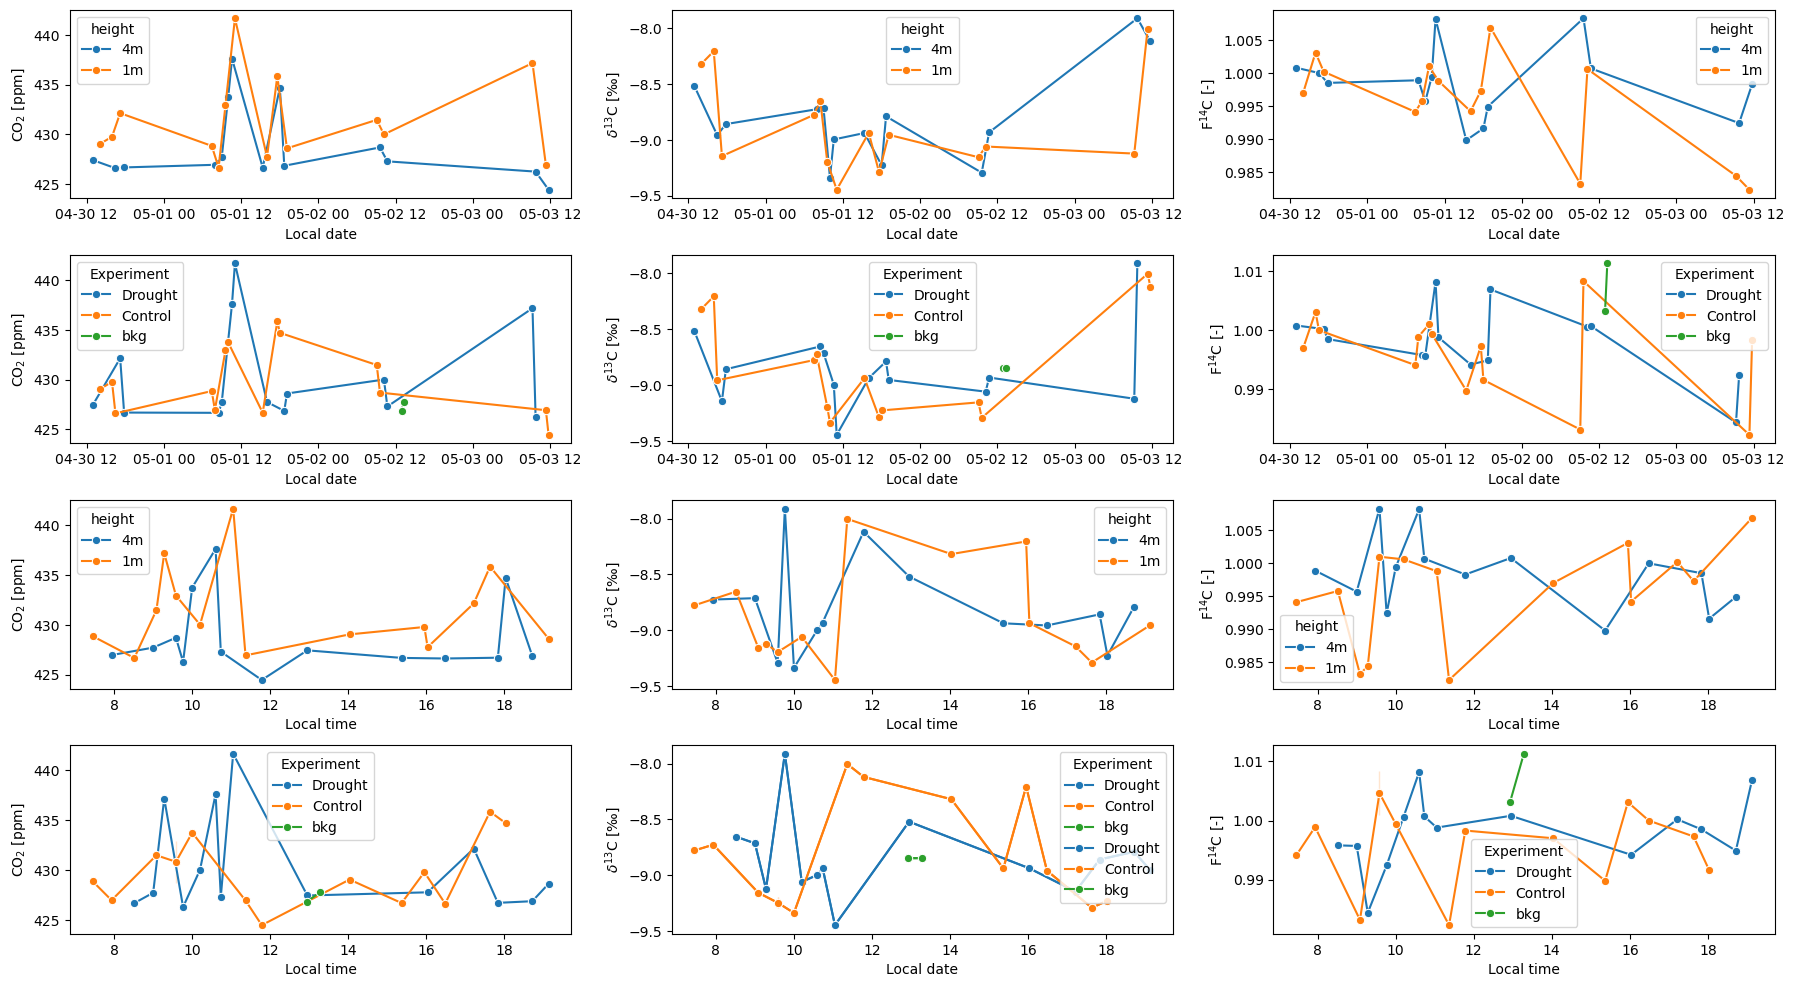

In [4]:
fig,ax=plt.subplots(4,3,figsize=(22,12))
palette=sns.color_palette("tab10",3)

# by height.
sns.lineplot(data=df,x="sampling time",y="CO2",hue="height", marker="o",palette=palette,ax=ax[0,0])
ax[0,0].set_xlabel('Local date')
ax[0,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=df,x="sampling time",y="d13C",hue="height", marker="o",palette=palette,ax=ax[0,1])
ax[0,1].set_xlabel('Local date')
ax[0,1].set_ylabel(r'$\delta^{13}$C [‰]')

sns.lineplot(data=df,x="sampling time",y="F14C",hue="height", marker="o",palette=palette,ax=ax[0,2])
ax[0,2].set_xlabel('Local date')
ax[0,2].set_ylabel(r'F$^{14}$C [-]')


# by experiment.
sns.lineplot(data=df,x="sampling time",y="CO2",hue="Experiment",marker="o",palette=palette,ax=ax[1,0])
ax[1,0].set_xlabel('Local date')
ax[1,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=df,x="sampling time",y="d13C",hue="Experiment",marker="o",palette=palette,ax=ax[1,1])
ax[1,1].set_xlabel('Local date')
ax[1,1].set_ylabel(r'$\delta^{13}$C [‰]')

sns.lineplot(data=df,x="sampling time",y="F14C",hue="Experiment",marker="o",palette=palette,ax=ax[1,2])
ax[1,2].set_xlabel('Local date')
ax[1,2].set_ylabel(r'F$^{14}$C [-]')

# local time, by height.
sns.lineplot(data=df,x="dtime",y="CO2",hue="height",marker="o",palette=palette,ax=ax[2,0],sort=True)
ax[2,0].set_xlabel('Local time')
ax[2,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=df,x="dtime",y="d13C",hue="height",marker="o",palette=palette,ax=ax[2,1],sort=True)
ax[2,1].set_xlabel('Local time')
ax[2,1].set_ylabel(r'$\delta^{13}$C [‰]')

sns.lineplot(data=df,x="dtime",y="F14C",hue="height",marker="o",palette=palette,ax=ax[2,2],sort=True)
ax[2,2].set_xlabel('Local time')
ax[2,2].set_ylabel(r'F$^{14}$C [-]')

# local time, by experiment. 
sns.lineplot(data=df,x="dtime",y="CO2",hue="Experiment",marker="o",palette=palette,ax=ax[3,0],sort=True)
ax[3,0].set_xlabel('Local time')
ax[3,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=df,x="dtime",y="d13C",hue="Experiment",marker="o",palette=palette,ax=ax[3,1],sort=True)
ax[3,1].set_xlabel('Local time')
ax[3,1].set_ylabel(r'$\delta^{13}$C [‰]')

sns.lineplot(data=df,x="dtime",y="d13C",hue="Experiment",marker="o",palette=palette,ax=ax[3,1],sort=True)
ax[3,1].set_xlabel('Local date')
ax[3,1].set_ylabel(r'$\delta^{13}$C [‰]')

sns.lineplot(data=df,x="dtime",y="F14C",hue="Experiment",marker="o",palette=palette,ax=ax[3,2],sort=True)
ax[3,2].set_xlabel('Local time')
ax[3,2].set_ylabel(r'F$^{14}$C [-]')

plt.subplots_adjust(wspace=0.2,hspace=0.3)

fig.savefig('Figures/Data_field/timeseriesd13Cd14C_Prades.pdf')

### Keeling plots of $\delta^{13}$C 

In [5]:
exp=['Drought','Control']

/tmp/ipykernel_22146/271260368.py:15: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df,x=1/df["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
/tmp/ipykernel_22146/271260368.py:52: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
/tmp/ipykernel_22146/271260368.py:52: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,


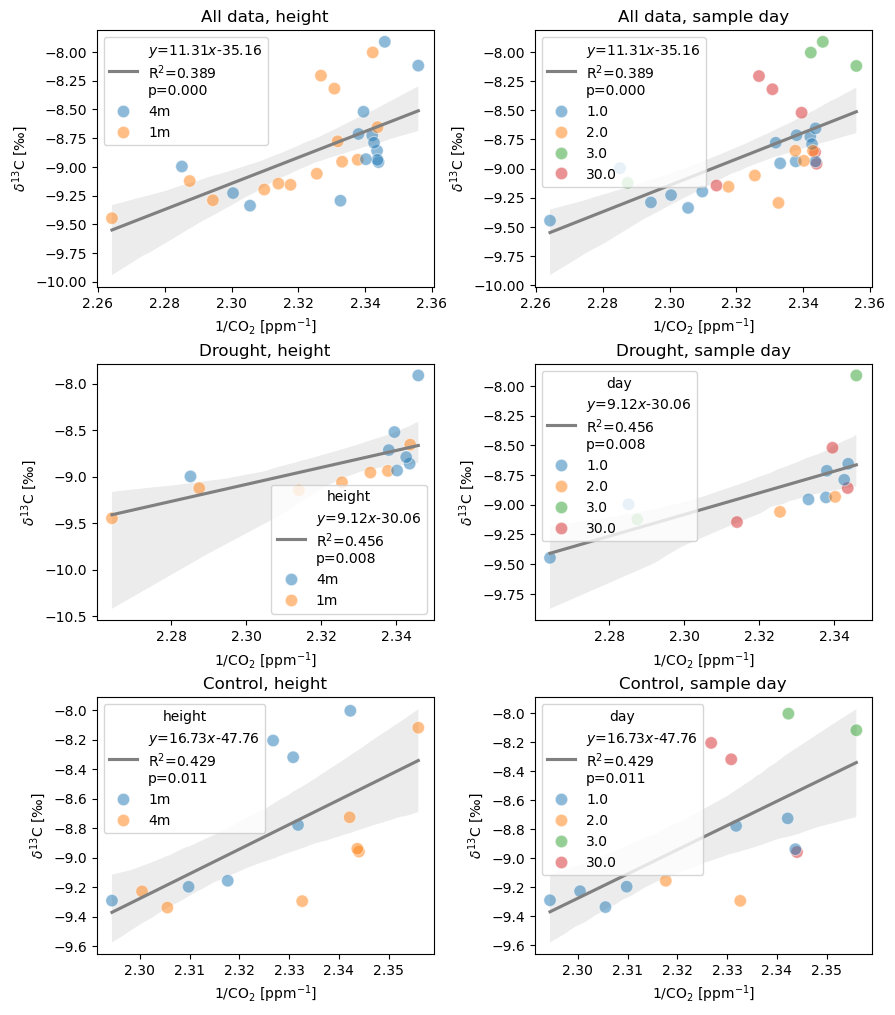

In [20]:
# Keeling plots
palette=sns.color_palette("tab10",4)
fig,axs=plt.subplots(3,2,figsize=(10,12))
df["CO2-1"]=1/df["CO2"]*1000

# all data together
slope,intercept,r_value,pv,se=stats.linregress(1/df["CO2"]*1000,df["d13C"])
results=regress2(1/df["CO2"],df["d13C"])
slope,intercept,r_value,pv,se

sns.regplot(data=df,x=1/df["CO2"]*1000,y="d13C",ax=axs[0,0],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=df,x=1/df["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[0,0])
handles,labels=axs[0,1].get_legend_handles_labels()
axs[0,0].legend(handles=handles[0:], labels=labels[0:])
axs[0,0].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
axs[0,0].set_ylabel(r'$\delta^{13}$C [‰]')
axs[0,0].set_title('All data, height')


sns.regplot(data=df,x=1/df["CO2"]*1000,y="d13C",ax=axs[0,1],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=df,x=1/df["CO2"]*1000,y="d13C",hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[0,1])
handles,labels=axs[0,1].get_legend_handles_labels()
axs[0,1].legend(handles=handles[0:], labels=labels[0:])
axs[0,1].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
axs[0,1].set_ylabel(r'$\delta^{13}$C [‰]')
axs[0,1].set_title('All data, sample day')


# split by experiments
exp=['Drought','Control']

for i in range(2): #drought and control.
    #fw2=fw[fw['Experiment']==exp[i]]
    fw2=df[df['Experiment']==exp[i]]
        
    slope,intercept,r_value,pv,se=stats.linregress(1/fw2["CO2"]*1000,fw2["d13C"])
    results=regress2(1/fw2["CO2"],fw2["d13C"])
    slope,intercept,r_value,pv,se
    
    sns.regplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",ax=axs[i+1,0],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[i+1,0])
    handles,labels=axs[1,i].get_legend_handles_labels()
    axs[i+1,0].legend(handles=handles[0:], labels=labels[0:],title='height')
    axs[i+1,0].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
    axs[i+1,0].set_ylabel(r'$\delta^{13}$C [‰]')
    axs[i+1,0].set_title(exp[i]+', height')

for i in range(2): #drought and control.
    fw2=df[df['Experiment']==exp[i]]
        
    slope,intercept,r_value,pv,se=stats.linregress(1/fw2["CO2"]*1000,fw2["d13C"])
    results=regress2(1/fw2["CO2"],fw2["d13C"])
    slope,intercept,r_value,pv,se
    
    sns.regplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",ax=axs[i+1,1],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[i+1,1])
#     handles,labels=axs[2,i].get_legend_handles_labels()
#     axs[i+1,1].legend(handles=handles[0:], labels=labels[0:])
    axs[i+1,1].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
    axs[i+1,1].set_ylabel(r'$\delta^{13}$C [‰]')
    axs[i+1,1].set_title(exp[i]+', sample day')

    
plt.subplots_adjust(wspace=0.3,hspace=0.3)
fig.savefig('Figures/Data_field/KP_d13C_Prades.pdf')

### Keeling plots of F$^{14}$C 

/tmp/ipykernel_22146/1878158486.py:14: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df,x=1/df["CO2"]*1000,y="F14C",hue="height",palette=palette,s=80,
/tmp/ipykernel_22146/1878158486.py:50: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="F14C",hue="height",palette=palette,s=80,
/tmp/ipykernel_22146/1878158486.py:50: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="F14C",hue="height",palette=palette,s=80,


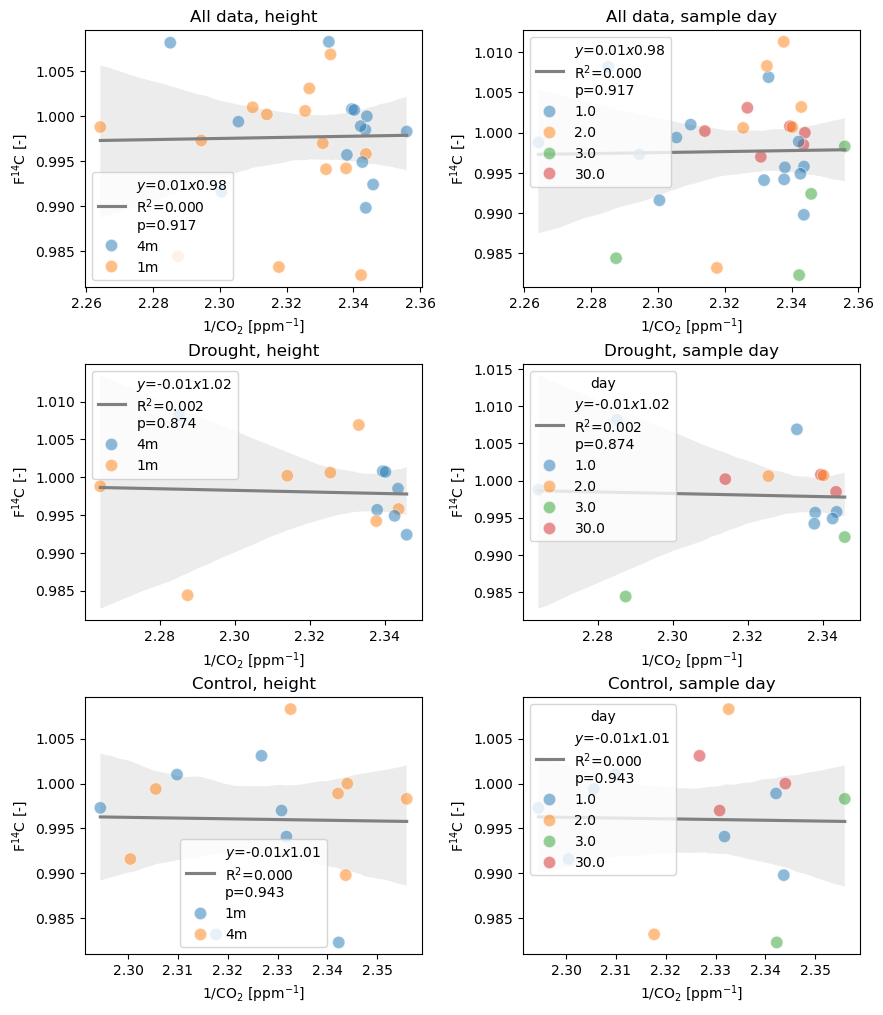

In [21]:
# Keeling plots
palette=sns.color_palette("tab10",4)
fig,axs=plt.subplots(3,2,figsize=(10,12))

# all data together
slope,intercept,r_value,pv,se=stats.linregress(1/df["CO2"]*1000,df["F14C"])
results=regress2(1/df["CO2"],df["F14C"])
slope,intercept,r_value,pv,se

sns.regplot(data=df,x=1/df["CO2"]*1000,y="F14C",ax=axs[0,0],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=df,x=1/df["CO2"]*1000,y="F14C",hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[0,0])
handles,labels=axs[0,1].get_legend_handles_labels()
axs[0,0].legend(handles=handles[0:], labels=labels[0:])
axs[0,0].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
axs[0,0].set_ylabel(r'F$^{14}$C [-]')
axs[0,0].set_title('All data, height')


sns.regplot(data=df,x=1/df["CO2"]*1000,y="F14C",ax=axs[0,1],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=df,x=1/df["CO2"]*1000,y="F14C",hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[0,1])
handles,labels=axs[0,1].get_legend_handles_labels()
axs[0,1].legend(handles=handles[0:], labels=labels[0:])
axs[0,1].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
axs[0,1].set_ylabel(r'F$^{14}$C [-]')
axs[0,1].set_title('All data, sample day')


# split by experiments
exp=['Drought','Control']

for i in range(2): #drought and control.
    #fw2=fw[fw['Experiment']==exp[i]]
    fw2=df[df['Experiment']==exp[i]]
        
    slope,intercept,r_value,pv,se=stats.linregress(1/fw2["CO2"]*1000,fw2["F14C"])
    #results=regress2(1/fw2["CO2"],fw2["F14C"])
    
    sns.regplot(data=fw2,x=1/fw2["CO2"]*1000,y="F14C",ax=axs[i+1,0],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="F14C",hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[i+1,0])
    handles,labels=axs[1,i].get_legend_handles_labels()
    axs[i+1,0].legend(handles=handles[0:], labels=labels[0:])
    axs[i+1,0].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
    axs[i+1,0].set_ylabel(r'F$^{14}$C [-]')
    axs[i+1,0].set_title(exp[i]+', height')

for i in range(2): #drought and control.
    fw2=df[df['Experiment']==exp[i]]
        
    slope,intercept,r_value,pv,se=stats.linregress(1/fw2["CO2"]*1000,fw2["F14C"])
    #results=regress2(1/fw2["CO2"],fw2["F14C"])
    
    sns.regplot(data=fw2,x=1/fw2["CO2"]*1000,y="F14C",ax=axs[i+1,1],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="F14C",hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[i+1,1])
#     handles,labels=axs[2,i].get_legend_handles_labels()
#     axs[i+1,1].legend(handles=handles[0:], labels=labels[0:])
    axs[i+1,1].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
    axs[i+1,1].set_ylabel(r'F$^{14}$C [-]')
    axs[i+1,1].set_title(exp[i]+', sample day')

    
plt.subplots_adjust(wspace=0.3,hspace=0.3)
fig.savefig('Figures/Data_field/KP_F14C_Prades.pdf')

### Miller-Tans F$^{14}$C

In [8]:
df[df['Experiment']=='bkg'].F14C

24    1.0032
25    1.0113
Name: F14C, dtype: float64

/tmp/ipykernel_24831/54434505.py:17: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette,s=80,
/tmp/ipykernel_24831/54434505.py:51: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette,s=80,
/tmp/ipykernel_24831/54434505.py:51: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette,s=80,


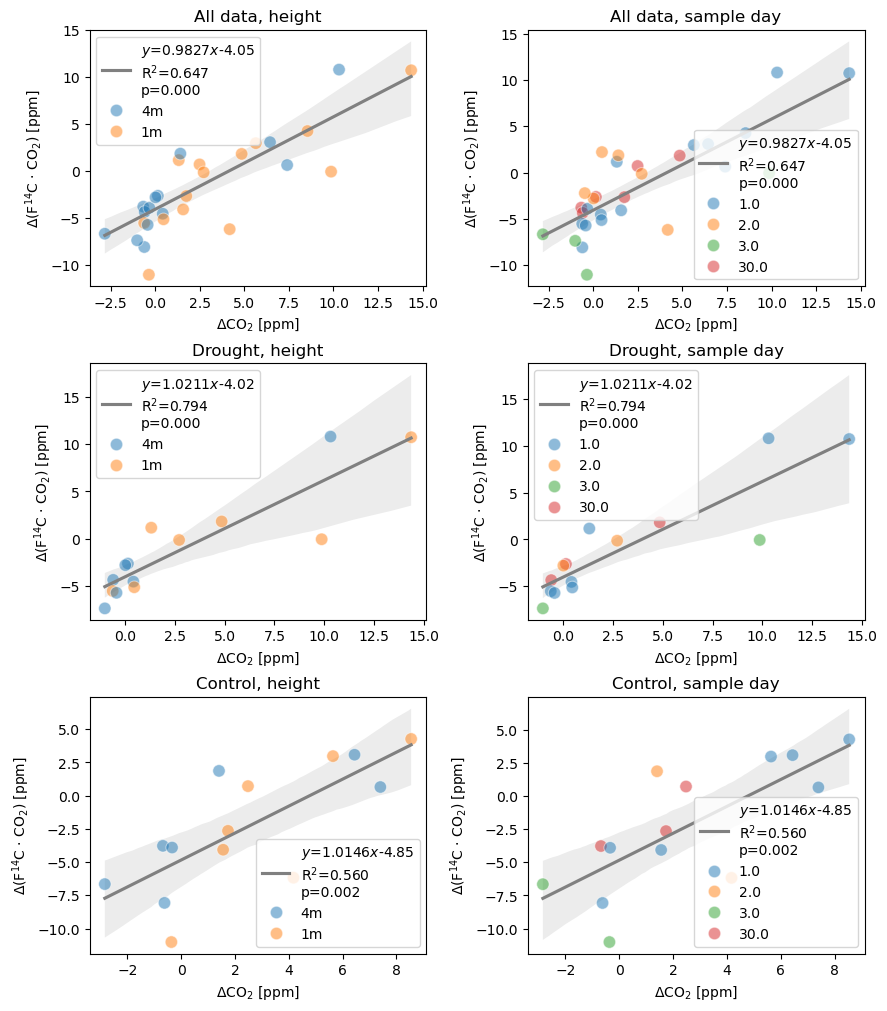

In [9]:
palette=sns.color_palette("tab10",4)
fig,axs=plt.subplots(3,2,figsize=(10,12))

bkg_CO2=df[df['Experiment']=='bkg'].CO2.mean()
bkg_F14C=df[df['Experiment']=='bkg'].F14C.mean()
bkg_CO2F14C=(df[df['Experiment']=='bkg'].CO2*df[df['Experiment']=='bkg'].F14C).mean()

MT_x=df.CO2-bkg_CO2
MT_y=(df.F14C*df.CO2)-bkg_CO2F14C

# all data together
slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
sns.regplot(x=MT_x,y=MT_y,ax=axs[0,0],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[0,0])
axs[0,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[0,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
handles,labels=axs[0,0].get_legend_handles_labels()
axs[0,0].legend(handles=handles[0:], labels=labels[0:])
axs[0,0].set_title('All data, height')

slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
sns.regplot(x=MT_x,y=MT_y,ax=axs[0,1],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[0,1])
axs[0,1].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[0,1].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
handles,labels=axs[0,1].get_legend_handles_labels()
axs[0,1].legend(handles=handles[0:], labels=labels[0:])
axs[0,1].set_title('All data, sample day')

# split by experiments
exp=['Drought','Control']

for i in range(2): #drought and control.
    fw2=df[df['Experiment']==exp[i]]
    MT_x=fw2.CO2-bkg_CO2
    MT_y=(fw2.F14C*fw2.CO2)-bkg_CO2F14C
    
    slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
    sns.regplot(x=MT_x,y=MT_y,ax=axs[i+1,0],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[i+1,0])
    axs[i+1,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
    axs[i+1,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
    handles,labels=axs[1+1,0].get_legend_handles_labels()
    axs[i+1,0].legend(handles=handles[0:], labels=labels[0:])
    axs[i+1,0].set_title(exp[i]+', height')
    

for i in range(2): #drought and control.
    fw2=df[df['Experiment']==exp[i]]
    MT_x=fw2.CO2-bkg_CO2
    MT_y=(fw2.F14C*fw2.CO2)-bkg_CO2F14C
    
    slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
    sns.regplot(x=MT_x,y=MT_y,ax=axs[i+1,1],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[i+1,1])
    axs[i+1,1].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
    axs[i+1,1].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
    handles,labels=axs[i+1,1].get_legend_handles_labels()
    axs[i+1,1].legend(handles=handles[0:], labels=labels[0:])
    axs[i+1,1].set_title(exp[i]+', sample day')

plt.subplots_adjust(wspace=0.3,hspace=0.3)
fig.savefig('Figures/Data_field/MT_F14C_Prades.pdf')

## Variation of heights (bootstrapping)

In [18]:
nr=1000 # number of runs. 
npm=10 # minimum number of points for the regression.

#### Type II regression

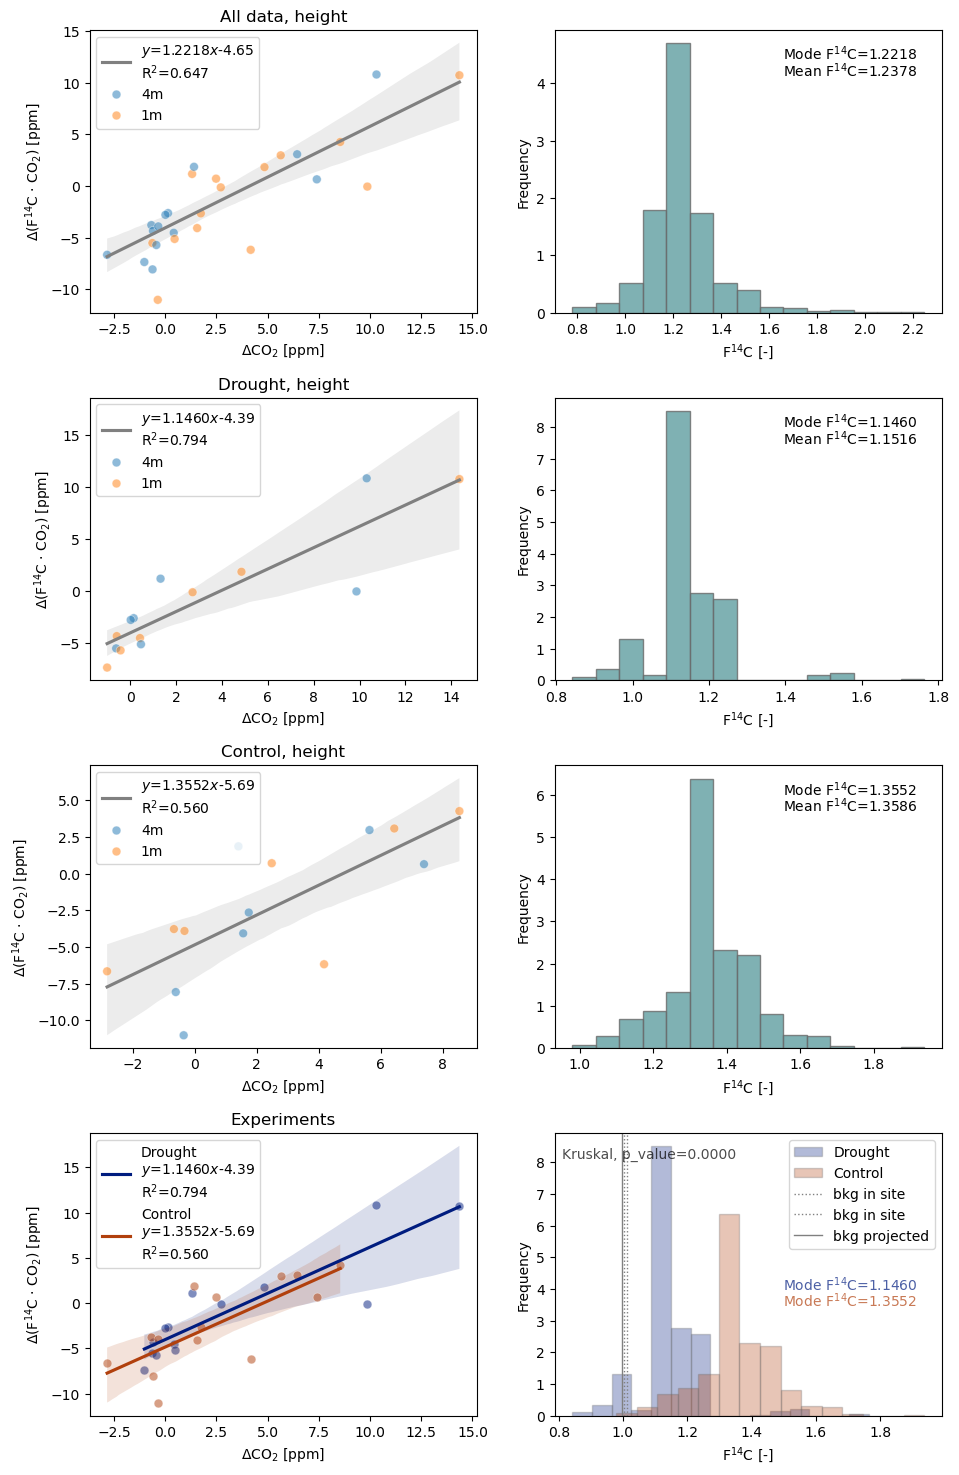

In [19]:
palette1=sns.color_palette("tab10",2)
palette2=sns.color_palette("dark",2)
fig,axs=plt.subplots(4,2,figsize=(11,18))

bkg_CO2=df[df['Experiment']=='bkg'].CO2.mean()
bkg_F14C=df[df['Experiment']=='bkg'].F14C.mean()
bkg_CO2F14C=(df[df['Experiment']=='bkg'].CO2*df[df['Experiment']=='bkg'].F14C).mean()

MT_x=df.CO2-bkg_CO2
MT_y=(df.F14C*df.CO2)-bkg_CO2F14C

# all data together
#slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
rr=regress2(MT_x,MT_y)
slope,intercept,se,r_value=rr['slope'],rr['intercept'],rr['std_slope'],rr['r']

sns.regplot(x=MT_x,y=MT_y,ax=axs[0,0],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette1,s=40,
                alpha=0.5,ax=axs[0,0])
axs[0,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[0,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
handles,labels=axs[0,0].get_legend_handles_labels()
axs[0,0].legend(handles=handles[0:], labels=labels[0:])
axs[0,0].set_title('All data, height')

slopes_n=np.zeros([nr,3])*np.nan# slopes, standard deviation of slopes and R, R2.
for j in range(nr):
    nn=random.randint(npm,len(df)) # number of points to be considered in the regression (minimum 10 points).
    nw=random.sample(range(0,len(df)),nn) # points to be considered

    MT_x=df.CO2[nw]-bkg_CO2
    MT_y=(df.F14C[nw]*df.CO2[nw])-bkg_CO2F14C
    rr=regress2(MT_x,MT_y)
    slopes_n[j,0:3]=rr['slope'],rr['std_slope'],rr['r']
axs[0,1].hist(slopes_n[:,0],15,facecolor='cadetblue',alpha=0.8,edgecolor='dimgray',density=True)
axs[0,1].set_xlabel(r'F$^{14}$C [-]')
axs[0,1].set_ylabel('Frequency')

axs[0,1].text(0.59,0.95,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[0,1].transAxes,
              verticalalignment="top",fontsize=10)
axs[0,1].text(0.59,0.89,"Mean F$^1$$^4$C={0:.4f}".format(np.mean(slopes_n[:,0])),transform=axs[0,1].transAxes,
              verticalalignment="top",fontsize=10)
# axs[0,1].text(0.59,0.83,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[0,1].transAxes,
#               verticalalignment="top",fontsize=10)

# split by experiments
exp=['Drought','Control']
for i in range(2): #drought and control.
    fw2=df[df['Experiment']==exp[i]]
    fw2=fw2.reset_index(drop=True)
    MT_x=fw2.CO2-bkg_CO2
    MT_y=(fw2.F14C*fw2.CO2)-bkg_CO2F14C
    
    #slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
    rr=regress2(MT_x,MT_y)
    slope,intercept,se,r_value=rr['slope'],rr['intercept'],rr['std_slope'],rr['r']
    sns.regplot(x=MT_x,y=MT_y,ax=axs[i+1,0],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
    sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette1,s=40,
                alpha=0.5,ax=axs[i+1,0])
    axs[i+1,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
    axs[i+1,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
    handles,labels=axs[1+1,0].get_legend_handles_labels()
    axs[i+1,0].legend(handles=handles[0:], labels=labels[0:])
    axs[i+1,0].set_title(exp[i]+', height')
    
# Both experiments together    
    sns.regplot(x=MT_x,y=MT_y,ax=axs[3,0],scatter=False,color=palette2[i],
            label=exp[i]+"\n$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
    sns.scatterplot(x=MT_x,y=MT_y,color=palette2[i],s=40,alpha=0.5,ax=axs[3,0])


# histogram-split by experiments      
    slopes_n=np.zeros([nr,3])*np.nan# slopes, standard deviation of slopes and R, R2.
    for j in range(nr):
        nn=random.randint(npm,len(fw2)) # number of points to be considered in the regression (minimum 10 points).
        nw=random.sample(range(0,len(fw2)),nn) # points to be considered

        MT_x=fw2.CO2[nw]-bkg_CO2
        MT_y=(fw2.F14C[nw]*fw2.CO2[nw])-bkg_CO2F14C
        rr=regress2(MT_x,MT_y)
        slopes_n[j,0:3]=rr['slope'],rr['std_slope'],rr['r']
    if i==0:F14C_dro=slopes_n[:,0]; res_dro=slopes_n 
    if i==1:F14C_con=slopes_n[:,0]; res_con=slopes_n  
    axs[i+1,1].hist(slopes_n[:,0],15,facecolor='cadetblue',alpha=0.8,edgecolor='dimgray',density=True)
    axs[i+1,1].set_xlabel(r'F$^{14}$C [-]')
    axs[i+1,1].set_ylabel('Frequency')

    axs[i+1,1].text(0.59,0.95,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[i+1,1].transAxes,
             verticalalignment="top",fontsize=10)
    axs[i+1,1].text(0.59,0.89,"Mean F$^1$$^4$C={0:.4f}".format(np.mean(slopes_n[:,0])),transform=axs[i+1,1].transAxes,
             verticalalignment="top",fontsize=10)
#     axs[i+1,1].text(0.59,0.83,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[i+1,1].transAxes,
#               verticalalignment="top",fontsize=10)
  
    axs[3,1].hist(slopes_n[:,0],15,facecolor=palette2[i],alpha=0.3,edgecolor='dimgray',density=True,label=exp[i])

    axs[3,1].text(0.59,0.50-i*0.06,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[3,1].transAxes,
            verticalalignment="top",fontsize=10,color=palette2[i],alpha=0.7)
    
bkg_values=df[df['Experiment']=='bkg'].F14C.values
for xc in bkg_values:
    axs[3,1].axvline(x=xc, color='gray', linestyle=':', linewidth=1,label='bkg in site')
F14C_atmod=0.9975615225273415 # Modeled value.
axs[3,1].axvline(x=F14C_atmod, color='gray', linewidth=1, label='bkg projected')

    
axs[3,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[3,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
handles,labels=axs[3,0].get_legend_handles_labels()
axs[3,0].legend(handles=handles[0:], labels=labels[0:])
axs[3,0].set_title('Experiments')
axs[3,1].legend()
axs[3,1].set_xlabel(r'F$^{14}$C [-]')
axs[3,1].set_ylabel('Frequency')
plt.subplots_adjust(wspace=0.2,hspace=0.3)

b=stats.kruskal(F14C_dro,F14C_con)
axs[3,1].text(0.02,0.95,"Kruskal, p_value={0:.4f}".format(b[1]),transform=axs[3,1].transAxes,
            verticalalignment="top",fontsize=10,alpha=0.7)

fig.savefig('Figures/Data_field/MT_F14C_Prades_histo_TypeII.pdf')



In [12]:
#fm_D14C



fm_D14C(1.3552,2024)

343.12339434252647

array([1.0032, 1.0113])

#### Type I regression

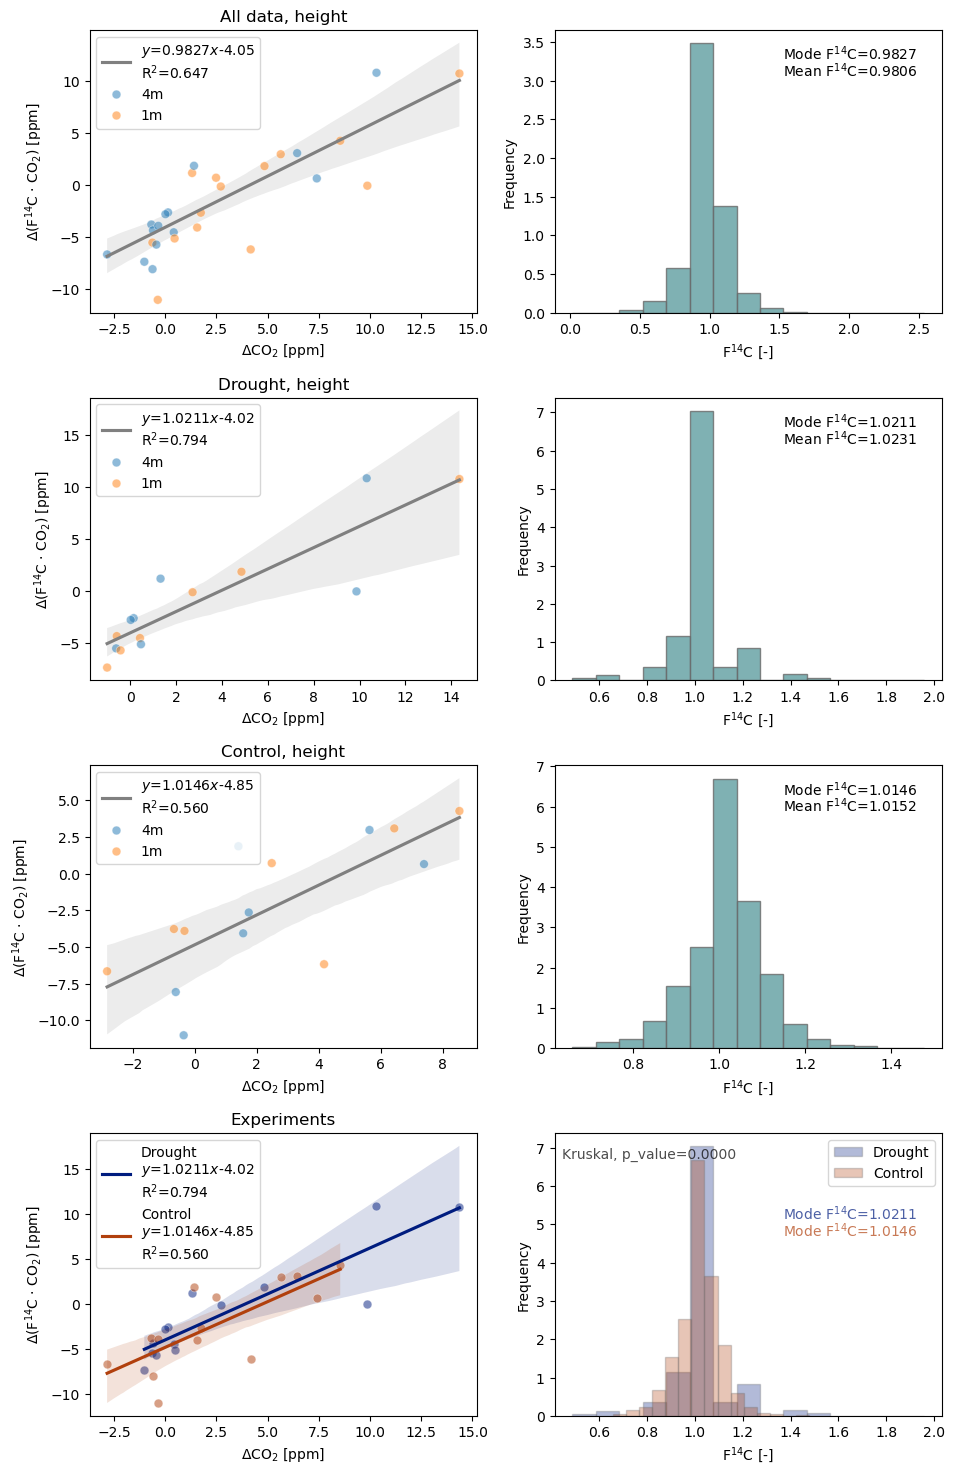

In [151]:
palette1=sns.color_palette("tab10",2)
palette2=sns.color_palette("dark",2)
fig,axs=plt.subplots(4,2,figsize=(11,18))

bkg_CO2=df[df['Experiment']=='bkg'].CO2.mean()
bkg_F14C=df[df['Experiment']=='bkg'].F14C.mean()
bkg_CO2F14C=(df[df['Experiment']=='bkg'].CO2*df[df['Experiment']=='bkg'].F14C).mean()

MT_x=df.CO2-bkg_CO2
MT_y=(df.F14C*df.CO2)-bkg_CO2F14C

# all data together
slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
#rr=regress2(MT_x,MT_y)
#slope,intercept,se,r_value=rr['slope'],rr['intercept'],rr['std_slope'],rr['r']

sns.regplot(x=MT_x,y=MT_y,ax=axs[0,0],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette1,s=40,
                alpha=0.5,ax=axs[0,0])
axs[0,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[0,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
handles,labels=axs[0,0].get_legend_handles_labels()
axs[0,0].legend(handles=handles[0:], labels=labels[0:])
axs[0,0].set_title('All data, height')

slopes_n=np.zeros([nr,3])*np.nan# slopes, standard deviation of slopes and R, R2.
for j in range(nr):
    nn=random.randint(npm,len(df)) # number of points to be considered in the regression (minimum 10 points).
    nw=random.sample(range(0,len(df)),nn) # points to be considered

    MT_x=df.CO2[nw]-bkg_CO2
    MT_y=(df.F14C[nw]*df.CO2[nw])-bkg_CO2F14C
    slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
    slopes_n[j,0:3]=slope,se,r_value
    #rr=regress2(MT_x,MT_y)
    #slopes_n[j,0:3]=rr['slope'],rr['std_slope'],rr['r']
axs[0,1].hist(slopes_n[:,0],15,facecolor='cadetblue',alpha=0.8,edgecolor='dimgray',density=True)
axs[0,1].set_xlabel(r'F$^{14}$C [-]')
axs[0,1].set_ylabel('Frequency')

axs[0,1].text(0.59,0.95,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[0,1].transAxes,
              verticalalignment="top",fontsize=10)
axs[0,1].text(0.59,0.89,"Mean F$^1$$^4$C={0:.4f}".format(np.mean(slopes_n[:,0])),transform=axs[0,1].transAxes,
              verticalalignment="top",fontsize=10)
# axs[0,1].text(0.59,0.83,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[0,1].transAxes,
#               verticalalignment="top",fontsize=10)

# split by experiments
exp=['Drought','Control']
for i in range(2): #drought and control.
    fw2=df[df['Experiment']==exp[i]]
    fw2=fw2.reset_index(drop=True)
    MT_x=fw2.CO2-bkg_CO2
    MT_y=(fw2.F14C*fw2.CO2)-bkg_CO2F14C
    
    slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
    #rr=regress2(MT_x,MT_y)
    #slope,intercept,se,r_value=rr['slope'],rr['intercept'],rr['std_slope'],rr['r']
    sns.regplot(x=MT_x,y=MT_y,ax=axs[i+1,0],scatter=False,color='gray',
            label="$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
    sns.scatterplot(data=df,x=MT_x,y=MT_y,hue="height",palette=palette1,s=40,
                alpha=0.5,ax=axs[i+1,0])
    axs[i+1,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
    axs[i+1,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
    handles,labels=axs[1+1,0].get_legend_handles_labels()
    axs[i+1,0].legend(handles=handles[0:], labels=labels[0:])
    axs[i+1,0].set_title(exp[i]+', height')
    
# Both experiments together    
    sns.regplot(x=MT_x,y=MT_y,ax=axs[3,0],scatter=False,color=palette2[i],
            label=exp[i]+"\n$y$={0:.4f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
    sns.scatterplot(x=MT_x,y=MT_y,color=palette2[i],s=40,alpha=0.5,ax=axs[3,0])


# histogram-split by experiments      
    slopes_n=np.zeros([nr,3])*np.nan# slopes, standard deviation of slopes and R, R2.
    for j in range(nr):
        nn=random.randint(npm,len(fw2)) # number of points to be considered in the regression (minimum 10 points).
        nw=random.sample(range(0,len(fw2)),nn) # points to be considered

        MT_x=fw2.CO2[nw]-bkg_CO2
        MT_y=(fw2.F14C[nw]*fw2.CO2[nw])-bkg_CO2F14C
        slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
        slopes_n[j,0:3]=slope,se,r_value
        #rr=regress2(MT_x,MT_y)
        #slopes_n[j,0:3]=rr['slope'],rr['std_slope'],rr['r']
    if i==0:F14C_dro=slopes_n[:,0]; res_dro=slopes_n 
    if i==1:F14C_con=slopes_n[:,0]; res_con=slopes_n  
    axs[i+1,1].hist(slopes_n[:,0],15,facecolor='cadetblue',alpha=0.8,edgecolor='dimgray',density=True)
    axs[i+1,1].set_xlabel(r'F$^{14}$C [-]')
    axs[i+1,1].set_ylabel('Frequency')

    axs[i+1,1].text(0.59,0.95,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[i+1,1].transAxes,
             verticalalignment="top",fontsize=10)
    axs[i+1,1].text(0.59,0.89,"Mean F$^1$$^4$C={0:.4f}".format(np.mean(slopes_n[:,0])),transform=axs[i+1,1].transAxes,
             verticalalignment="top",fontsize=10)
#     axs[i+1,1].text(0.59,0.83,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[i+1,1].transAxes,
#               verticalalignment="top",fontsize=10)
  
    axs[3,1].hist(slopes_n[:,0],15,facecolor=palette2[i],alpha=0.3,edgecolor='dimgray',density=True,label=exp[i])

    axs[3,1].text(0.59,0.75-i*0.06,"Mode F$^1$$^4$C={0:.4f}".format(mode(slopes_n[:,0])),transform=axs[3,1].transAxes,
            verticalalignment="top",fontsize=10,color=palette2[i],alpha=0.7)
    
axs[3,0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[3,0].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
handles,labels=axs[3,0].get_legend_handles_labels()
axs[3,0].legend(handles=handles[0:], labels=labels[0:])
axs[3,0].set_title('Experiments')
axs[3,1].legend()
axs[3,1].set_xlabel(r'F$^{14}$C [-]')
axs[3,1].set_ylabel('Frequency')
plt.subplots_adjust(wspace=0.2,hspace=0.3)

b=stats.kruskal(F14C_dro,F14C_con)
axs[3,1].text(0.02,0.95,"Kruskal, p_value={0:.4f}".format(b[1]),transform=axs[3,1].transAxes,
            verticalalignment="top",fontsize=10,alpha=0.7)

fig.savefig('Figures/Data_field/MT_F14C_Prades_histo_TypeI.pdf')

In [23]:
slopes_ER=pd.DataFrame({'Control':res_con[:,0],'Drought':res_dro[:,0]})

In [24]:
slopes_ER.to_csv('F14C_slopes_ER.csv')

In [19]:
b=stats.kruskal(F14C_dro,F14C_con)

In [4]:
fm_D14C(1.0146,2024)

5.558586112697217

In [22]:
res_con[:,0].mean()

1.35862634343672

### Relationship between slope and R$^{2}$

NameError: name 'res_con' is not defined

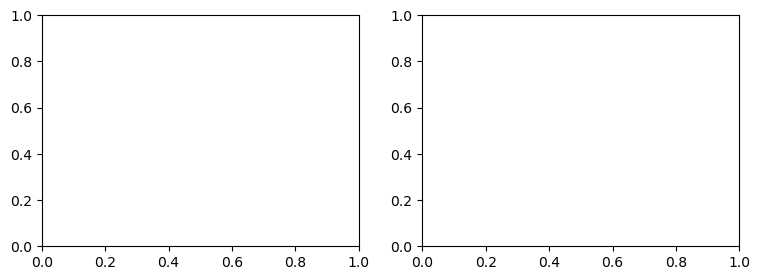

In [16]:
fig,axs=plt.subplots(1,2,figsize=(9,3))
axs[0].plot(res_con[:,2],res_con[:,0],'.',markersize=4)
axs[1].plot(res_dro[:,2],res_dro[:,0],'.',markersize=4,color='orange')
axs[0].set_title('Control'); axs[1].set_title('Drought')
axs[0].set_xlabel(r'R$^{2}$'); axs[1].set_xlabel(r'R$^{2}$')
axs[1].set_ylabel(r'F$^{14}C$'); axs[1].set_ylabel(r'F$^{14}C$')

### Comparison of slopes


Difference in slopes: 0.006570538771765166
Z-statistic: 0.021924381753812252
P-value: 0.9825082756207275


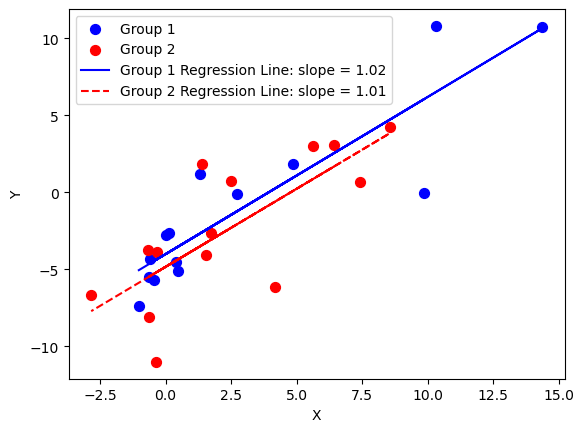


The difference in slopes is not statistically significant.


In [15]:
import numpy as np
import statsmodels.api as sm
#import statsmodels as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
# Sample data for two groups
# Group 1 data (x1, y1)

fw=df[df['Experiment']==exp[0]]
x1 = fw.CO2-bkg_CO2
y1 = (fw.F14C*fw.CO2)-bkg_CO2F14C

fw=df[df['Experiment']==exp[1]]
x2 = fw.CO2-bkg_CO2
y2 = (fw.F14C*fw.CO2)-bkg_CO2F14C


X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)

# Fit linear regression models for both groups
model1 = sm.OLS(y1, X1).fit()
model2 = sm.OLS(y2, X2).fit()

# Print the results of both models
# print(f"Group 1 Regression Summary:\n{model1.summary()}")
# print(f"Group 2 Regression Summary:\n{model2.summary()}")

# To compare the slopes, we can test if the difference in slopes is statistically significant
# Calculate the difference in slopes
slope1 = model1.params[1]  # Slope for Group 1
slope2 = model2.params[1]  # Slope for Group 2

# Compute standard error of the difference of slopes
se1 = model1.bse[1]  # Standard error for slope of Group 1
se2 = model2.bse[1]  # Standard error for slope of Group 2

# Compute the z-statistic for the difference in slopes
z_stat = (slope1 - slope2) / np.sqrt(se1**2 + se2**2)
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))  # Two-tailed test

print(f"\nDifference in slopes: {slope1 - slope2}")
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Plotting the regression lines for visualization
plt.scatter(x1, y1, color='blue', label='Group 1', s=50)
plt.scatter(x2, y2, color='red', label='Group 2', s=50)

# Plot the regression lines
plt.plot(x1, model1.predict(X1), color='blue', linestyle='-', label=f'Group 1 Regression Line: slope = {slope1:.2f}')
plt.plot(x2, model2.predict(X2), color='red', linestyle='--', label=f'Group 2 Regression Line: slope = {slope2:.2f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Conclusion based on p-value
if p_value < 0.05:
    print("\nThe difference in slopes is statistically significant.")
else:
    print("\nThe difference in slopes is not statistically significant.")


## Figures paper

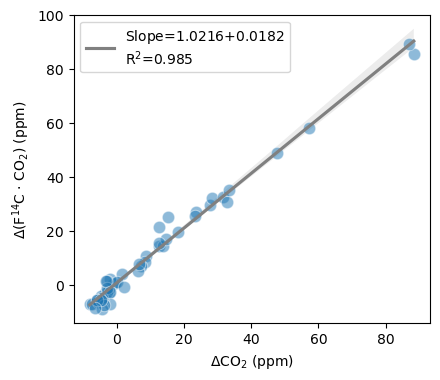

In [48]:
fig,axs=plt.subplots(1,figsize=(4.6,4))

sns.regplot(x=MT_x,y=MT_y,scatter=False,color='gray', ax=axs,
            label="Slope={0:.4f}$+${1:.4f}".format(slope,std_slope)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
           # +"\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(x=MT_x,y=MT_y,s=80,ax=axs,alpha=0.5)

axs.set_xlabel(r'$\Delta$CO$_2$ (ppm)')
axs.set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) (ppm)')



fig.savefig('Example_Miller-Tans_SVB.pdf',bbox_inches='tight')


#plt.subplots_adjust(wspace=0.3)

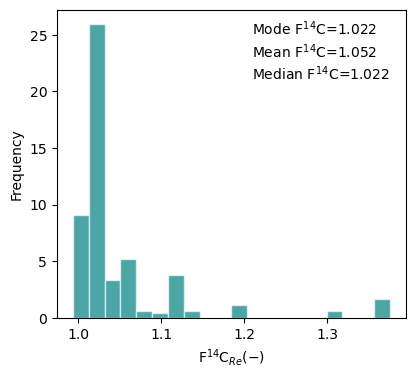

In [77]:
fig,axs=plt.subplots(1,figsize=(4.5,4))

axs.hist(slopes_H[:,0],20,facecolor='teal',alpha=0.7,edgecolor='ghostwhite',
         density=True,label="Mode slope={0:.4f}".format(mode(slopes_H[:,0]))+r' ‰ \n Mean')


axs.text(1.21,25,"Mode F$^1$$^4$C={0:.3f}".format(mode(slopes_H[:,0])))
axs.text(1.21,23,"Mean F$^1$$^4$C={0:.3f}".format(np.nanmean(slopes_H[:,0])))
axs.text(1.21,21,"Median F$^1$$^4$C={0:.3f}".format(np.nanmedian(slopes_H[:,0])))


axs.set_xlabel(r'F$^{14}$C$_{Re} (-)$')
axs.set_ylabel('Frequency')

fig.savefig('Histogram_Miller-Tans_SVB_F14C.pdf',bbox_inches='tight')
#axs.legend()


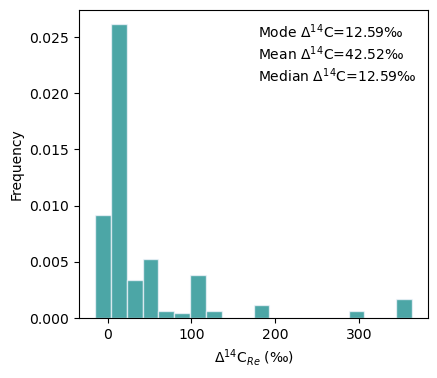

In [81]:
slopes_H_d14=fm_D14C(slopes_H[:,0],yr=2023) # it calls the function defined above. 


fig,axs=plt.subplots(1,figsize=(4.5,4))

axs.hist(slopes_H_d14,20,facecolor='teal',alpha=0.7,edgecolor='ghostwhite',
         density=True,label="Mode slope={0:.4f}".format(mode(slopes_H_d14))+r' ‰ \n Mean')

#axs.text(1.24,25, "  Mode={0:.3f}".format(mode(slopes_H[:,0])))
axs.text(180,0.025,"Mode $\Delta^1$$^4$C={0:.2f}".format(mode(slopes_H_d14))+r'‰')
axs.text(180,0.023,"Mean $\Delta^1$$^4$C={0:.2f}".format(np.nanmean(slopes_H_d14))+r'‰')
axs.text(180,0.021,"Median $\Delta^1$$^4$C={0:.2f}".format(np.nanmedian(slopes_H_d14))+r'‰')



axs.set_xlabel('$\Delta^{14}$C$_{Re}$ (‰)')
axs.set_ylabel('Frequency')

fig.savefig('Histogram_Miller-Tans_SVB_D14C.pdf',bbox_inches='tight')
# axs.legend()

## Save figures and data

In [20]:
df=pd.DataFrame(slopes_H,columns=['Slope','std_slope','R'])

df.to_csv("slope_Hv2.csv")

In [52]:
fig.savefig('Miller-Tans_SVB.pdf')